# Machine Learning: Decision Tree


In this notebook, I will perform machine learning on my dataset. Specifically, I will use a decision tree as my task for the dataset is to perform binary classification. 

To begin with I have to drop the ID columns so that the machine learning algorithm will not memorize the answer based on the ID number. Additionally, I will encode the 1s and 0s that are not already classified as binary. Then create a weight so that the fewer instances of 1s will be looked at with the same weight as the many instances of 0s. 

**Data Preparation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('train.csv')
df=data.drop(columns=['ID'])
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
label_encoder = LabelEncoder()

# encode non-binary values in feature columns
for column in df.columns:
    if df[column].nunique() > 2:  
        df[column] = label_encoder.fit_transform(df[column])

In [4]:
# Class weights
#class_counts = df['TARGET'].value_counts()
#class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]}

In [5]:
class_counts = df['TARGET'].value_counts()
class_weights = {0: 1.0, 1: 0.8 * (class_counts[0] / class_counts[1])}

**Decision Tree**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
# predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.930544593528019
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14597
           1       0.13      0.12      0.12       607

    accuracy                           0.93     15204
   macro avg       0.54      0.54      0.54     15204
weighted avg       0.93      0.93      0.93     15204

Confusion Matrix:
[[14073   524]
 [  532    75]]


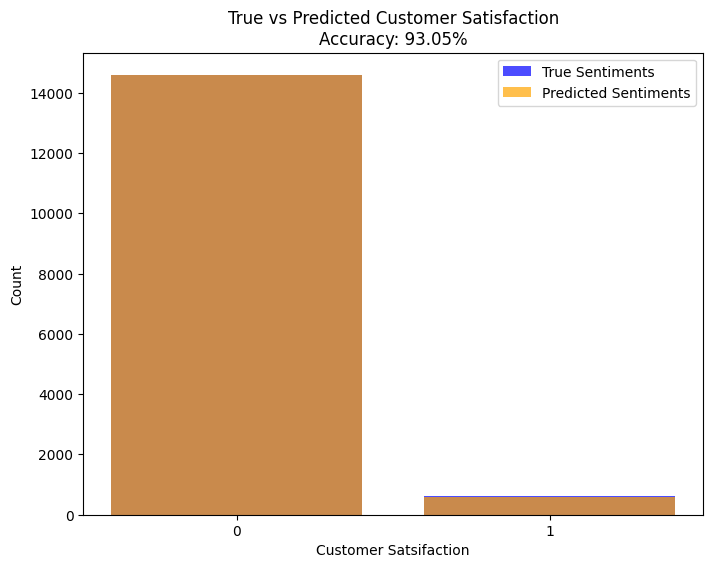

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(np.arange(len(conf_matrix)), conf_matrix.sum(axis=1), color='blue', alpha=0.7, label='True Sentiments')
ax.bar(np.arange(len(conf_matrix)), conf_matrix.sum(axis=0), color='orange', alpha=0.7, label='Predicted Sentiments')

ax.set_xticks(np.arange(len(conf_matrix)))
ax.set_xticklabels(sorted(y_test.unique()))  
ax.set_xlabel('Customer Satsifaction')
ax.set_ylabel('Count')
ax.set_title(f'True vs Predicted Customer Satisfaction\nAccuracy: {accuracy * 100:.2f}%')
ax.legend()

plt.show()

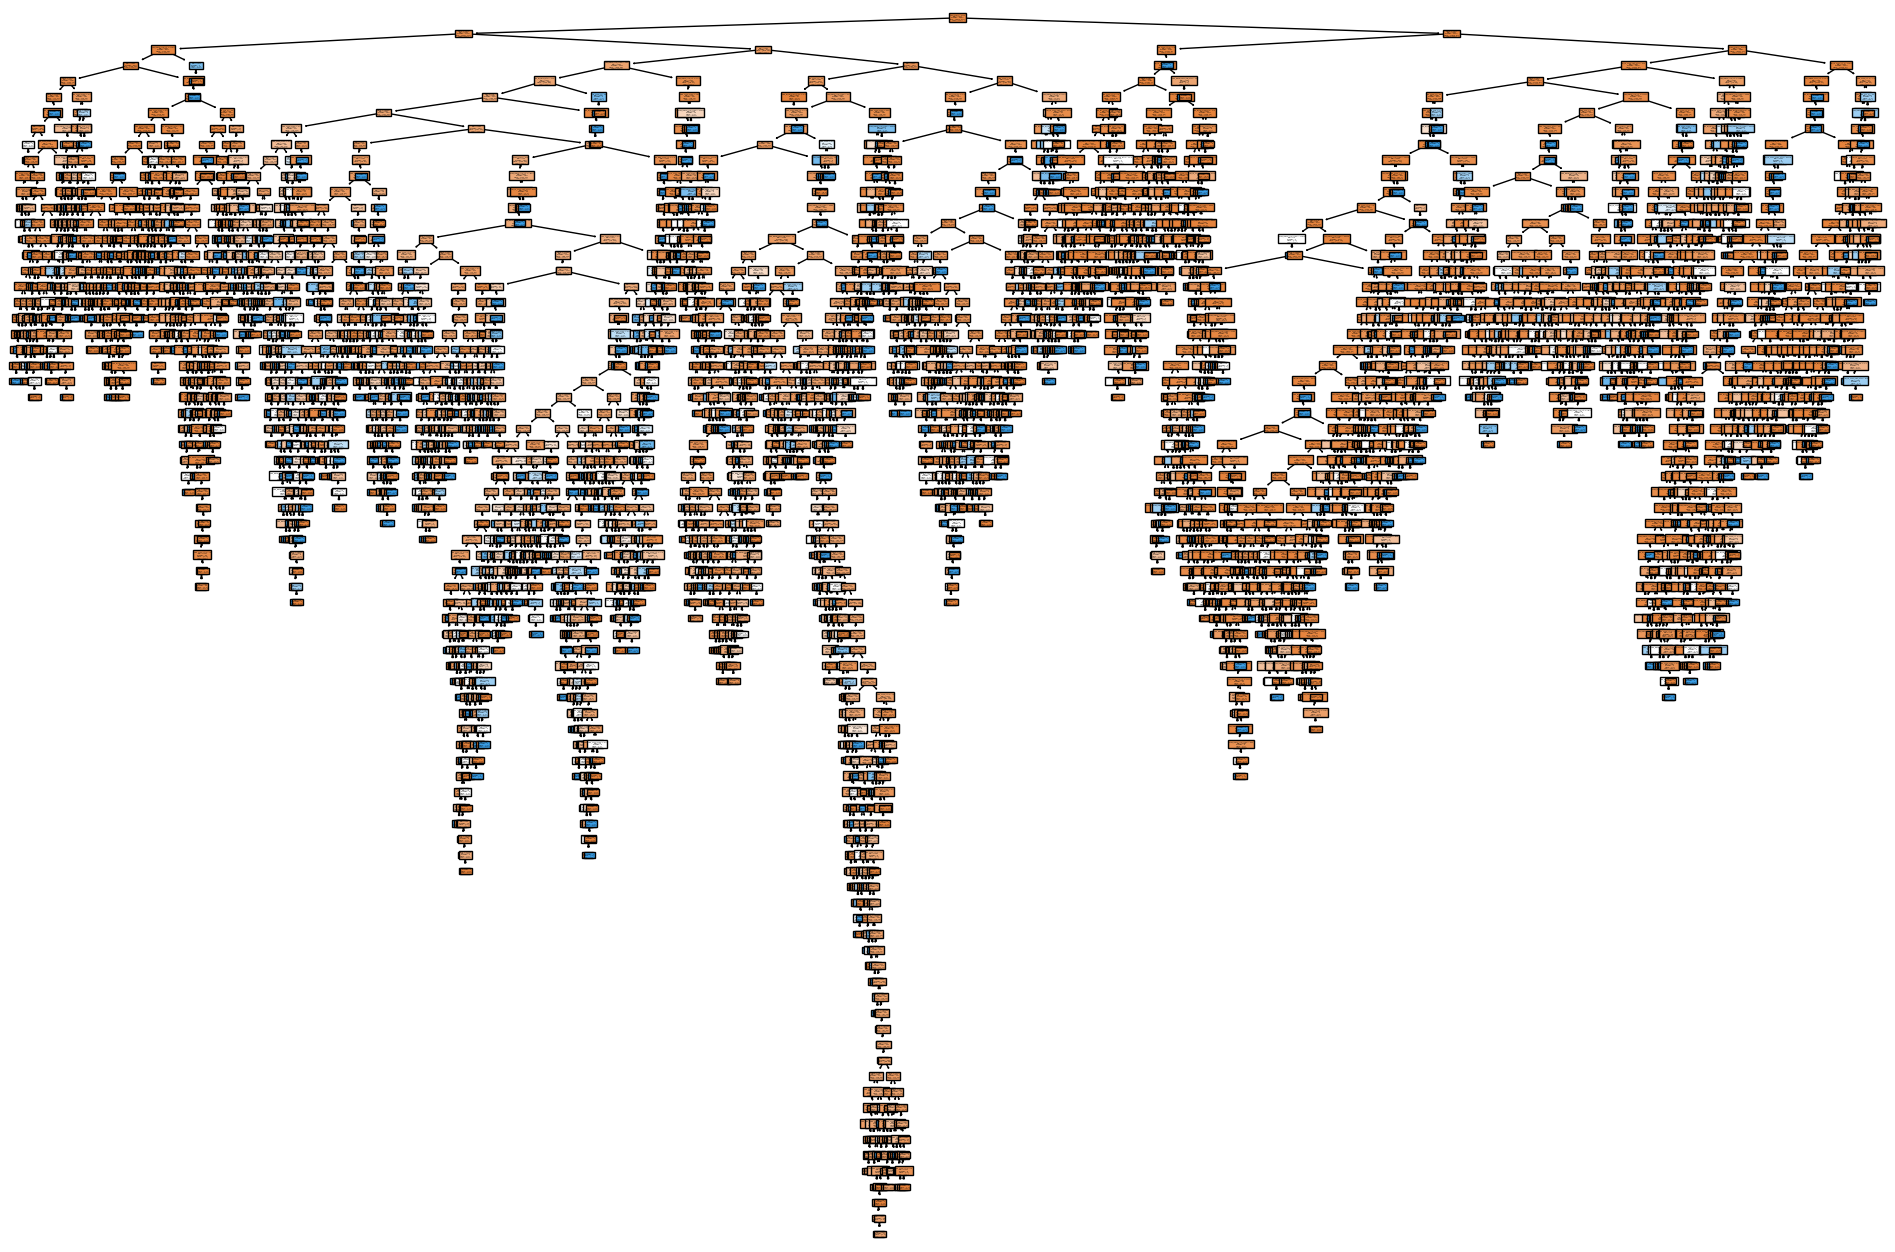

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 16))
plot_tree(model, feature_names=X.columns, class_names=['class 0', 'class 1'], filled=True)
plt.show()
